<a href="https://colab.research.google.com/github/khalilkhan1111/Yes-Bank-Stock-Closing_Price_Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Name -**          - Khalil Ullah Khan

# **Project Summary -**

The project focuses on analyzing the stock prices of Yes Bank, a prominent bank in the Indian financial sector, and predicting its monthly closing prices. The dataset used for this analysis, named "data_YesBank_StockPrices.csv," contains monthly stock price information since the bank's inception, including the opening, highest, lowest, and closing prices for each month. The project aims to determine if time series models or other predictive models can accurately predict stock prices, considering the impact of the fraud case involving Rana Kapoor, the bank's former CEO, which gained significant attention since 2018.

To begin the analysis, the dataset is explored to gain insights into the stock prices over time. A line graph is plotted to compare the closing prices from 2006 to 2020, providing a visual representation of the price fluctuations and trends. Additionally, scatter plots are used to examine the correlation between the dependent variable (closing price) and the independent variables (opening price, highest price, and lowest price). The scatter plots reveal a strong positive correlation between the dependent and independent variables.

To improve the predictions, the data is transformed using the logarithm base 10 (log10) function. This transformation aims to achieve a distribution that is closer to a normal distribution, as it is ideal for obtaining more accurate predictions. The independent variables (high, low, and open) are transformed using log10, as well as the dependent variable (close).

Next, feature handling techniques are employed to remove outliers from each column. Boxplots are utilized to identify and eliminate outliers that may adversely affect the accuracy of the predictive models.

Feature selection is carried out using Standard Scaler, Ridge regression. Cross-validation scores and average R2 scores are examined to determine the most appropriate features for the models.

To ensure the data is appropriately scaled, normalization is applied. This scaling technique ensures that all the features are on a similar scale, preventing any particular feature from dominating the model's predictions.

The dataset is then split into training and testing sets, with a test size of 20% and a train size of 80%. This division allows for the evaluation of the models' performance on unseen data.

Three machine learning algorithms are employed for prediction: Lasso regression, Ridge regression, and Elastic Net. These models are chosen for their effectiveness in handling regression tasks and their ability to provide reliable predictions. Each model is evaluated using cross-validation, which helps estimate the model's performance on unseen data.

By applying these techniques and models to the Yes Bank stock price dataset, the project aims to provide insights into the predictability of the bank's stock prices, considering the influence of the Rana Kapoor fraud case. The project assesses the effectiveness of time series models and other predictive models in capturing and predicting stock price movements. The ultimate goal is to generate accurate predictions that can assist investors and stakeholders in making informed decisions regarding Yes Bank stock.






# **GitHub Link -**

https://github.com/khalilkhan1111/Yes-Bank-Stock-Closing_Price_Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb

# **Problem Statement**


**Write Problem Statement Here.**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.



# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import missingno as msno
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/imp/project/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

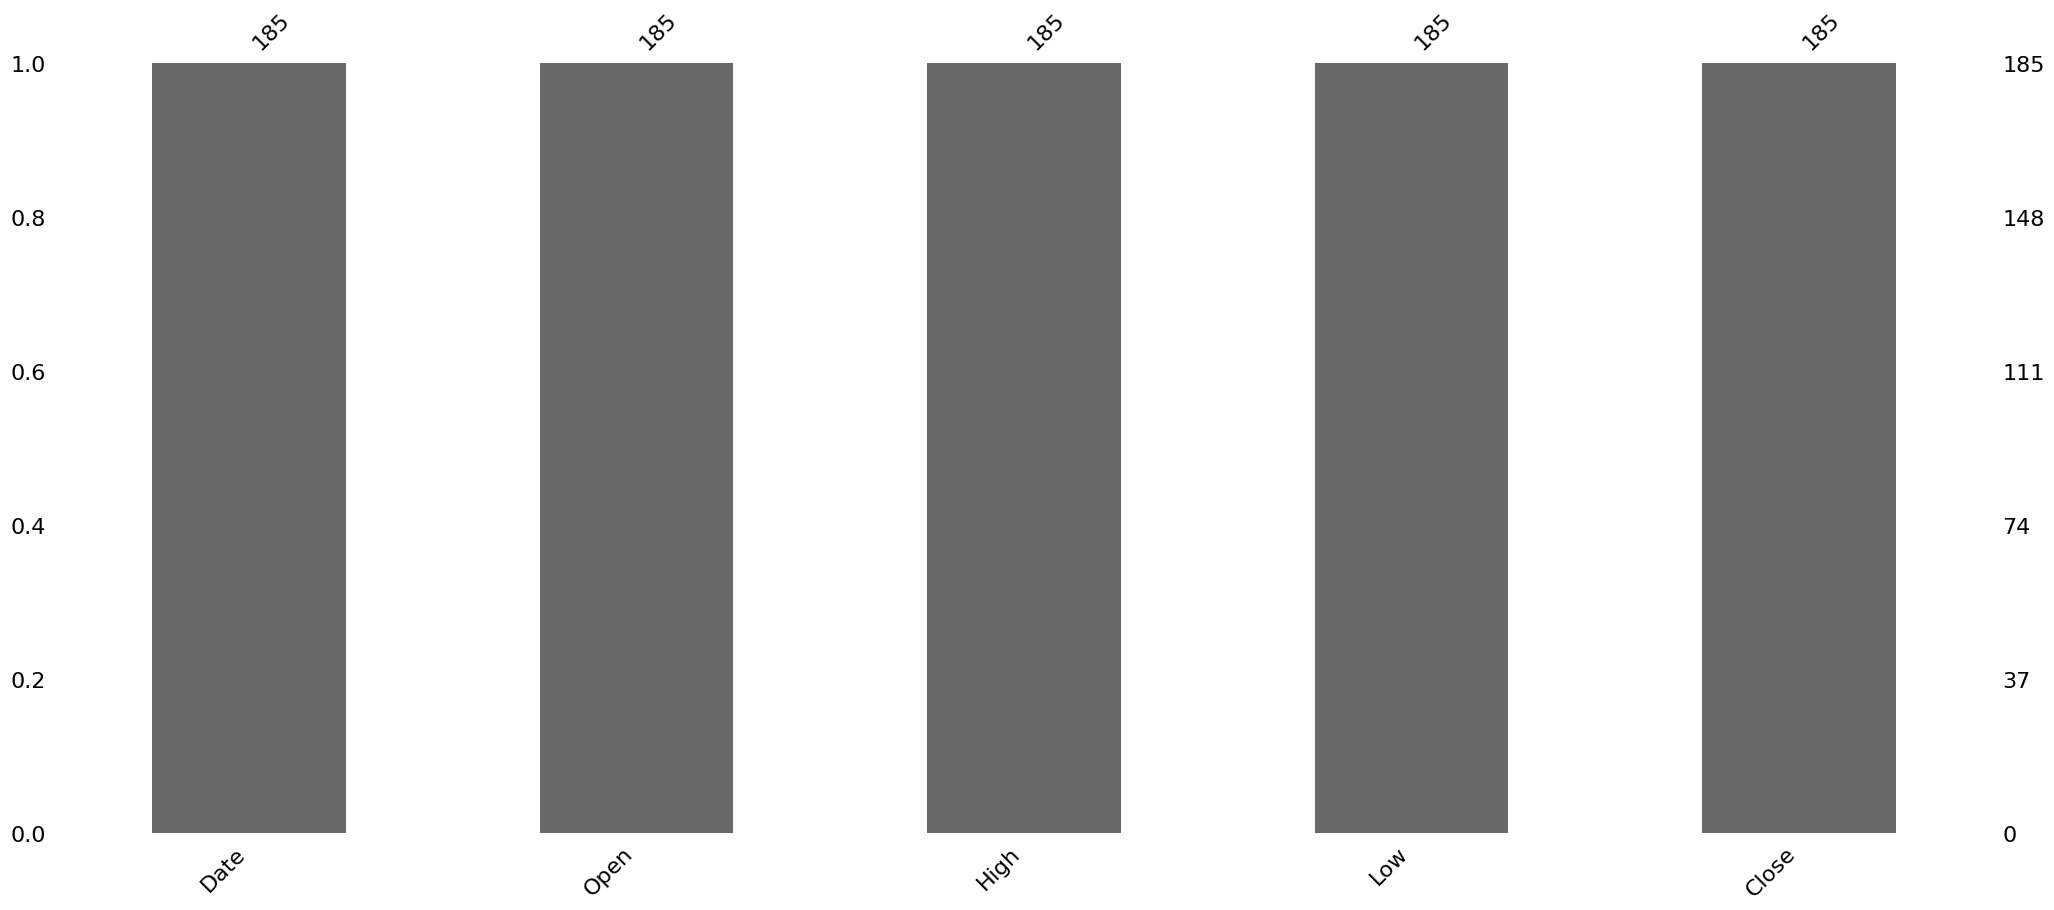

In [ ]:
# Visualizing the missing values
# Creating plot
msno.bar(df)

### What did you know about your dataset?

there is no null values

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

Dataset contains Yes Bank stock monthly prices since it inception. Following are its features:-

#**Date**  -  Date of record
#**Open**  -  Opening Price
#**High**  -  Highest Price In The Day
#**Low**   -  Lowest  Price In The Day
#**Close** -  Occupations Of The Speaker

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for Date: ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14'

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x : datetime.strptime(x, '%b-%y'))

In [ ]:
#check dtype of date now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


#**Check The Outliers**

<Axes: >

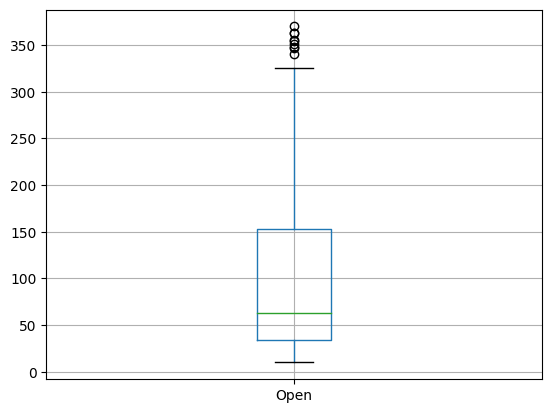

In [ ]:
df.boxplot('Open')

<Axes: >

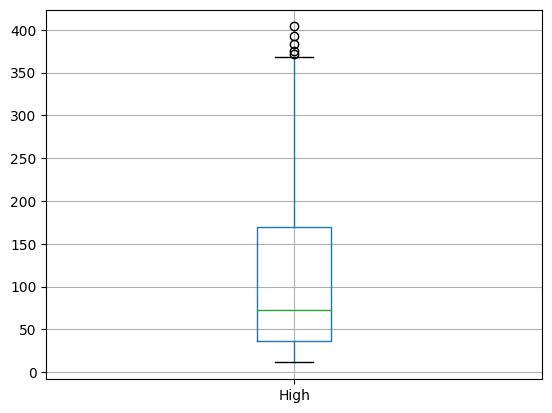

In [ ]:
df.boxplot('High')

<Axes: >

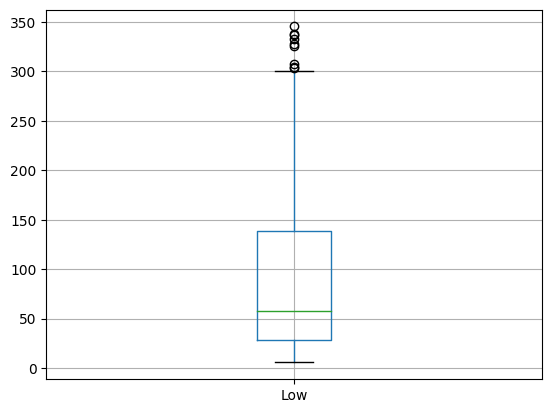

In [ ]:
df.boxplot('Low')

<Axes: >

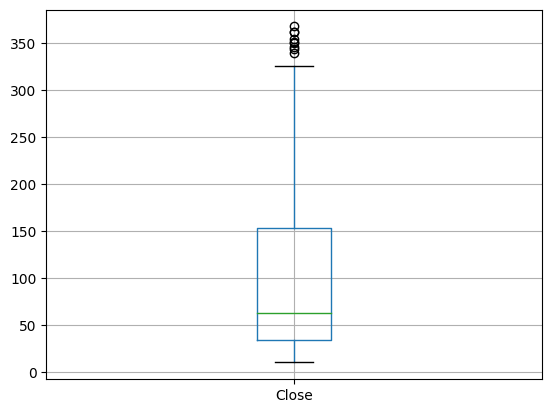

In [ ]:
df.boxplot('Close')

### What all manipulations have you done and insights you found?

We just change Date D-type object type into date-time and  check the outliers outliers came because of Fraud and sudden crash in stock market, it is ready to visualize data

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-25-81ea119dd217>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close'], color='Blue')


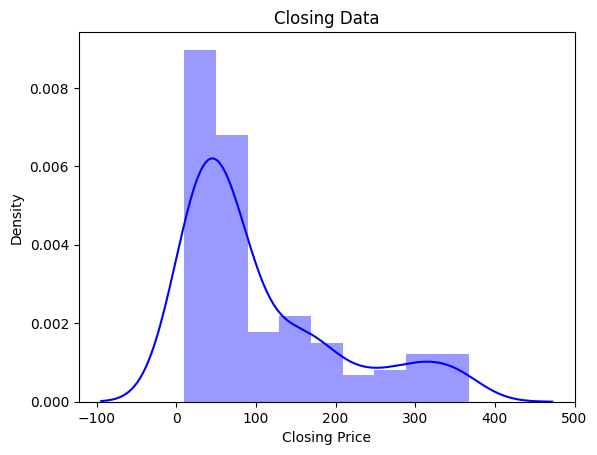

In [ ]:
# Chart - 1 visualization code
plt.figsize = (10,8)
sns.distplot(df['Close'], color='Blue')
plt.title('Closing Data')
plt.xlabel('Closing Price')
plt.show()

<ipython-input-24-89da387f770d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['Close']), color='Blue')


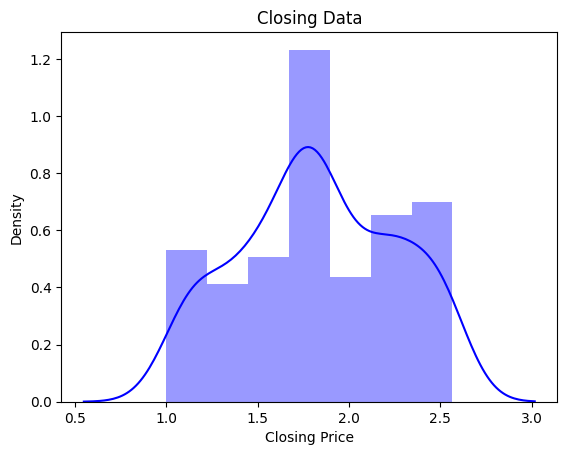

In [ ]:
# Log Transformation of 'Close' feature
plt.figsize = (10,8)
sns.distplot(np.log10(df['Close']), color='Blue')
plt.title('Closing Data')
plt.xlabel('Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

Understanding the distribution of the closing prices aids in making informed decisions when choosing appropriate modeling techniques or assessing the model's performance.

##### 2. What is/are the insight(s) found from the chart?

The dependent variable is positively skewed. To get better predictions, it is ideal if the independent variable is almost normally distributed.
To achieve this, we transform the data by log10.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Not a negative, we can fix it to get the better predications by transform the data by log, sqrt.

#### Chart - 2

<ipython-input-26-949a685ee3f2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Open'], color = 'Blue')


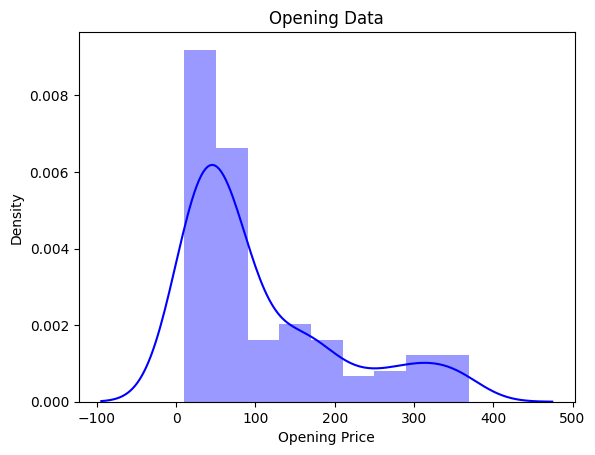

In [ ]:
# Chart - 2 visualization code
plt.figsize=(10,8)
sns.distplot(df['Open'], color = 'Blue')
plt.title('Opening Data')
plt.xlabel('Opening Price')
plt.show()

<ipython-input-27-459c460c683f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['Open']), color='Blue')


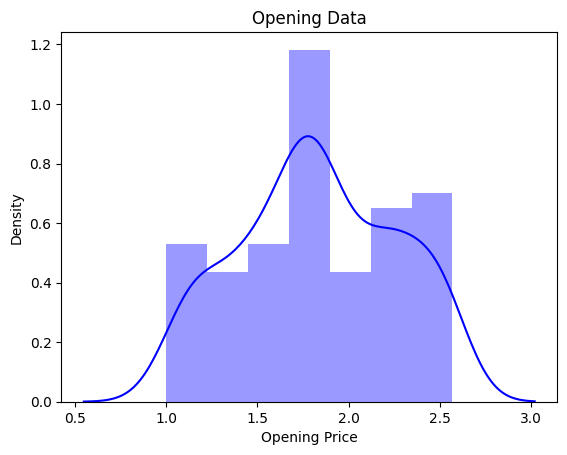

In [ ]:
# Log Transformation of 'Open' feature
plt.figsize = (10,8)
sns.distplot(np.log10(df['Open']), color='Blue')
plt.title('Opening Data')
plt.xlabel('Opening Price')
plt.show()

##### 1. Why did you pick the specific chart?

Understanding the distribution of the opening prices aids in making informed decisions when choosing appropriate modeling techniques or assessing the model's performance.

##### 2. What is/are the insight(s) found from the chart?

The independent variable is positively skewed. To get better predictions, it is ideal if the independent variable is almost normally distributed.
To achieve this, we transform the data by log10.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Not a negative, we can fix it to get the better predications by transform the data by log, sqrt.

#### Chart - 3

<ipython-input-30-a38a6c4dcd00>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['High'], color='Blue')


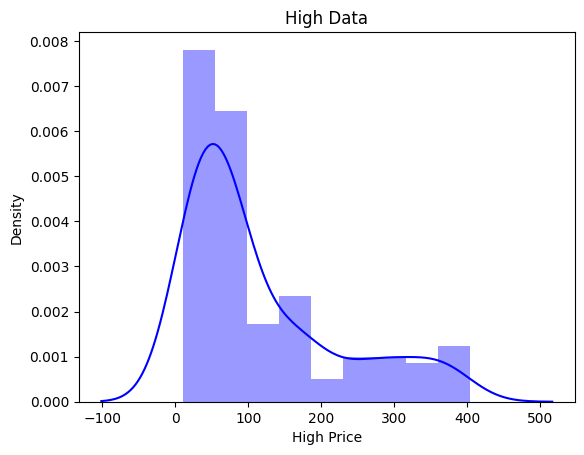

In [ ]:
# Chart - 3 visualization code
plt.figsize = (10,8)
sns.distplot(df['High'], color='Blue')
plt.title('High Data')
plt.xlabel('High Price')
plt.show()

<ipython-input-29-a5e10d21630f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['High']), color='Blue')


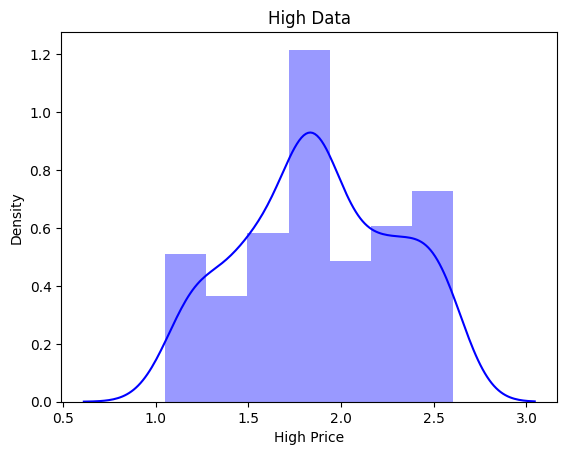

In [ ]:
# Log Transformation of 'High' feature
plt.figsize = (10,8)
sns.distplot(np.log10(df['High']), color='Blue')
plt.title('High Data')
plt.xlabel('High Price')
plt.show()

##### 1. Why did you pick the specific chart?

Understanding the distribution of the high prices aids in making informed decisions when choosing appropriate modeling techniques or assessing the model's performance.

##### 2. What is/are the insight(s) found from the chart?

The independent variable is positively skewed. To get better predictions, it is ideal if the independent variable is almost normally distributed.
To achieve this, we transform the data by log10.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Not a negative, we can fix it to get the better predications by transform the data by log, sqrt.

#### Chart - 4

<ipython-input-31-4dc706db4bab>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Low'], color='Blue')


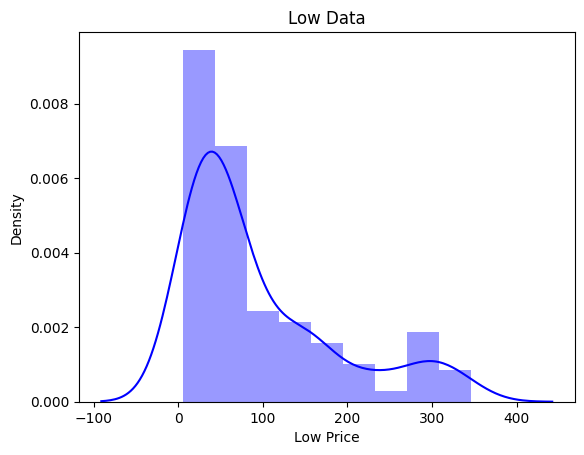

In [ ]:
# Chart - 4 visualization code
plt.figsize = (10,8)
sns.distplot(df['Low'], color='Blue')
plt.title('Low Data')
plt.xlabel('Low Price')
plt.show()

<ipython-input-32-064798c3c95f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['Low']), color='Blue')


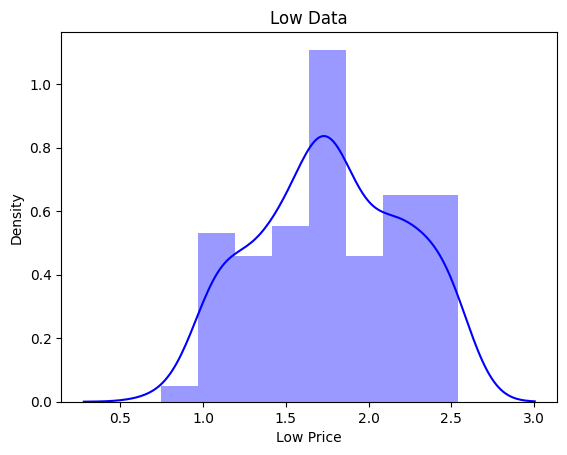

In [ ]:
# Log Transformation of 'Low' feature
plt.figsize = (10,8)
sns.distplot(np.log10(df['Low']), color='Blue')
plt.title('Low Data')
plt.xlabel('Low Price')
plt.show()

##### 1. Why did you pick the specific chart?

Understanding the distribution of the low prices aids in making informed decisions when choosing appropriate modeling techniques or assessing the model's performance.

##### 2. What is/are the insight(s) found from the chart?

The independent variable is positively skewed. To get better predictions, it is ideal if the independent variable is almost normally distributed.
To achieve this, we transform the data by log10.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Not a negative, we can fix it to get the better predications by transform the data by log, sqrt.

#### Chart - 5

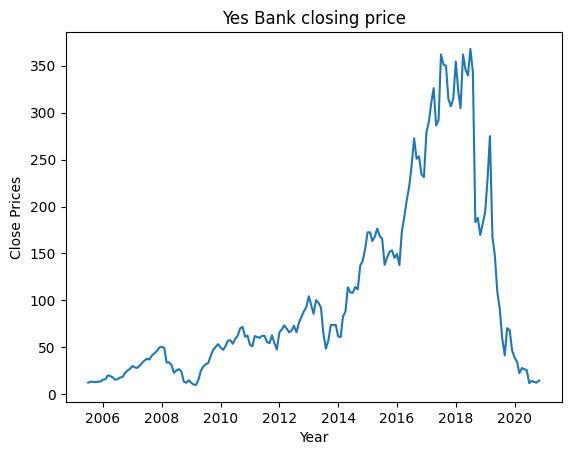

In [ ]:
# Chart - 5 visualization code
plt.figsize = (10,8)
plt.xlabel('Year')
plt.ylabel('Close Prices')
plt.plot(df['Date'], df['Close'])
plt.title('Yes Bank closing price')
plt.show()

##### 1. Why did you pick the specific chart?

In this chart, it will show us the all the insights of the dependent variable with cateogrical independent variables.

##### 2. What is/are the insight(s) found from the chart?

After the scam in 2018 company faced a huge loss in 2018 due to this stock market price went lowst drastically.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes in 2018 there is a negative growth till 2 year. The main reason is scammed in Yes bank by Rana Kapoor.

#### Chart - 6

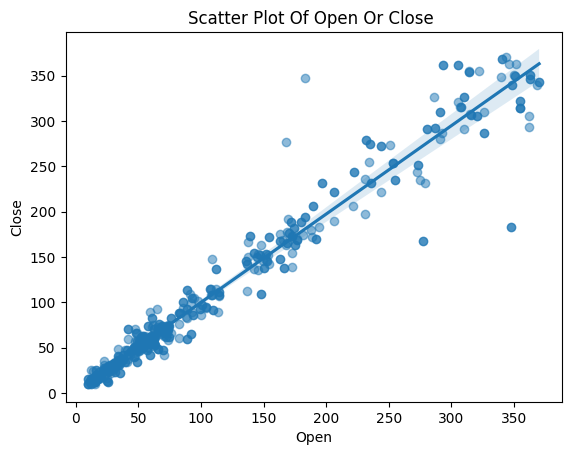

In [ ]:
# Chart - 6 visualization code
# realation between the Dependent Variable and independent Variable
# scatter plot with Best Fit line

plt.scatter(df['Close'], df['Open'], alpha=0.5)
plt.title('Scatter Plot Of Open Or Close ')
plt.xlabel('Open')
plt.ylabel('Close')
sns.regplot(x ='Open', y = 'Close', data= df)
plt.show()

##### 1. Why did you pick the specific chart?

This chart will show the relation between the dependent and continous independent variables.




##### 2. What is/are the insight(s) found from the chart?

It is highly positive co-related with open and close variable

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will help us to identify the positive and negative corelation between the variables.

#### Chart - 7

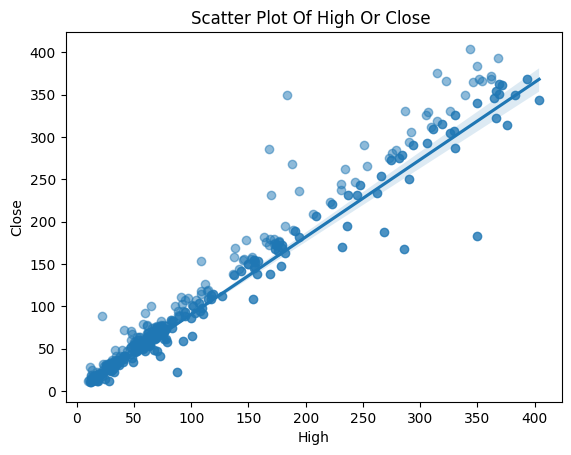

In [ ]:
# Chart - 7 visualization code
plt.scatter(df['Close'], df['High'], alpha=0.5)
plt.title('Scatter Plot Of High Or Close ')
plt.xlabel('High')
plt.ylabel('Close')
sns.regplot(x ='High', y = 'Close', data= df)
plt.show()

##### 1. Why did you pick the specific chart?

This chart will show the relation between the dependent and continous independent variables.


##### 2. What is/are the insight(s) found from the chart?

It is positive co-related with high and close variable.however, it is less important than open variable because of outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will help us to identify the positive and negative corelation between the variables.

#### Chart - 8

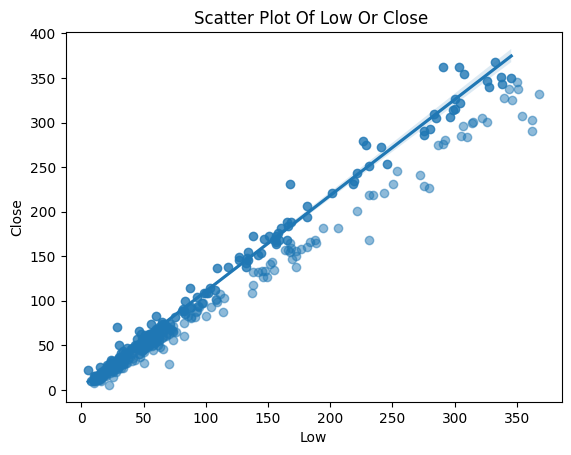

In [ ]:
# Chart - 8 visualization code
plt.scatter(df['Close'], df['Low'], alpha=0.5)
plt.title('Scatter Plot Of Low Or Close ')
plt.xlabel('Low')
plt.ylabel('Close')
sns.regplot(x ='Low', y = 'Close', data= df)
plt.show()

##### 1. Why did you pick the specific chart?

This chart will show the relation between the dependent and continous independent variables.


##### 2. What is/are the insight(s) found from the chart?

It is highly positive co-related with low and close variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will help us to identify the positive and negative corelation between the variables.

#### Chart - 9 - Correlation Heatmap

<ipython-input-38-fc2caa80b34b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=None, annot=True )


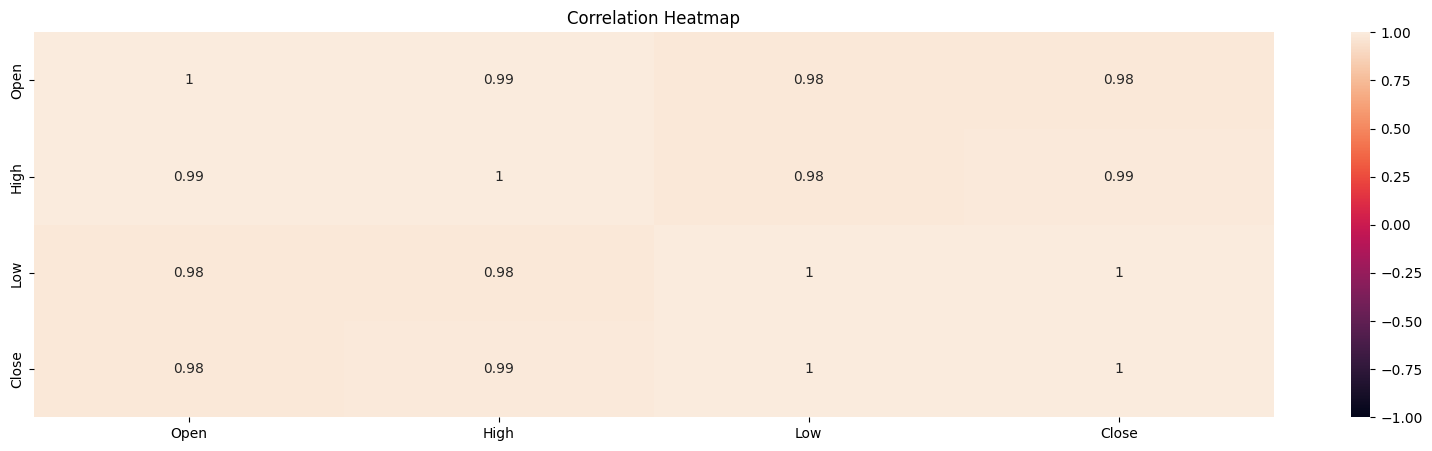

In [ ]:
# Correlation Heatmap visualization code
# check for existence of corelation
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
cor = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=None, annot=True )

In [ ]:
# multicorrelinearity
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):

  # calculating VIF
  vif =pd.df()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

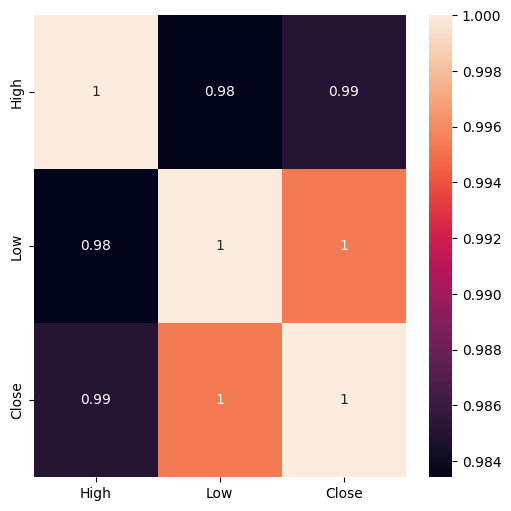

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df[['High','Low','Close']].corr(), annot= True, cmap= None)
plt.show()

We have dropped 3 features from our dataset because it can effect our model efficiency but neglecting high VIF is far more dangerous than dropping features.

So, we preferred to drop the features and move forward with the Low Variable.

##### 1. Why did you pick the specific chart?

The heatmap displays a matrix where each cell represents the correlation between two variables. This format allows for a comprehensive overview of the entire correlation structure of the dataset.

##### 2. What is/are the insight(s) found from the chart?

All the variables shows high correlation with each other.

#### Chart - 10 - Pair Plot

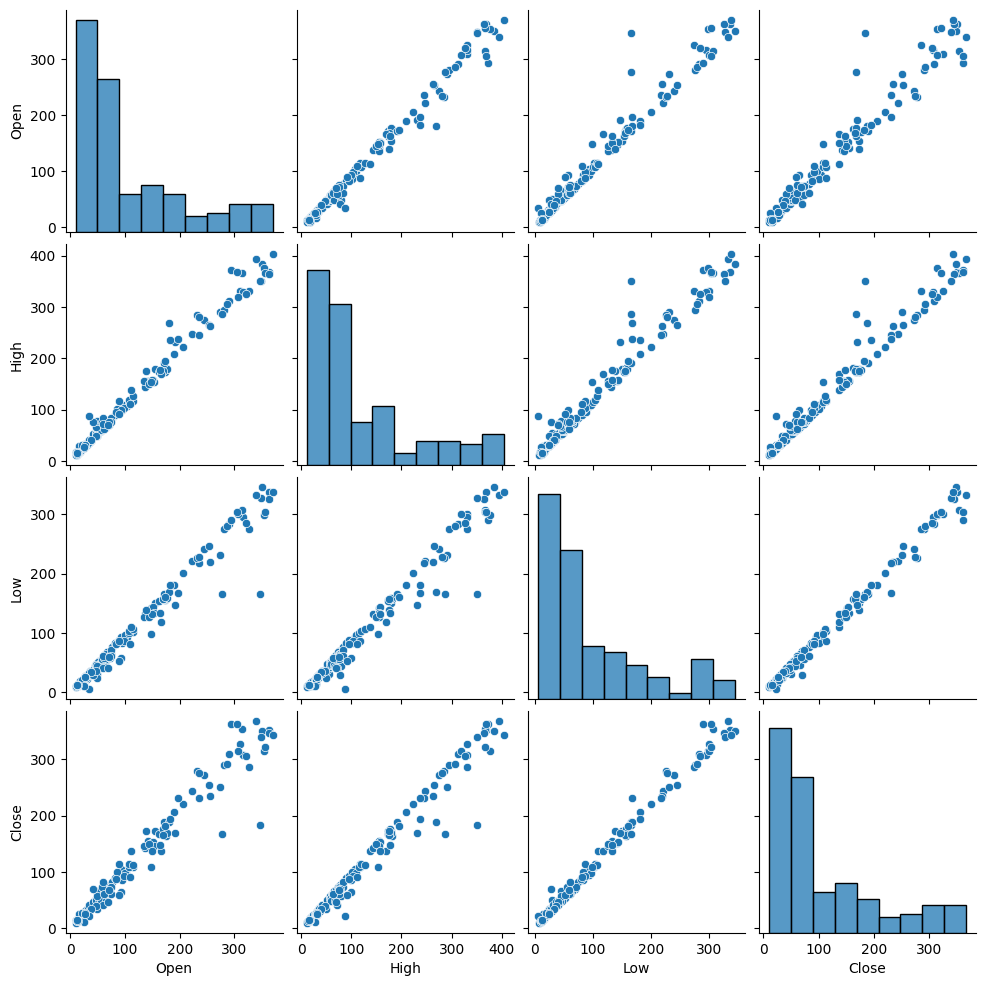

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

To explore pairwise relationships between multiple variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

All the independent and depent variavle is positive skewed and positive co-related with each other.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The t-statistic represents the magnitude of the difference between the means of High and Low relative to the variability within each group. In this case, a positive t-statistic indicates that the average stock prices of High are higher than those of Low

#### 2. Perform an appropriate statistical test.

In [11]:
# Perform Statistical Test to obtain P-Value
high_values = df['High'].values
low_values = df['Low'].values

# Print the extracted values
print("High Values:", high_values)
print("Low Values:", low_values)


High Values: [ 14.    14.88  14.87  14.47  13.88  14.44  17.16  16.97  20.95  20.8
  21.8   18.4   17.2   18.6   18.88  24.2   28.47  29.66  34.16  32.6
  31.58  31.99  36.14  36.38  41.04  39.    41.75  47.3   50.98  54.
  55.56  53.97  48.9   35.8   36.88  32.22  30.5   28.98  29.8   25.
  17.8   16.56  18.34  12.5   11.24  17.51  28.84  31.08  33.16  35.18
  41.3   52.34  54.98  55.67  57.58  51.48  52.06  59.48  58.08  59.9
  60.94  68.88  71.74  76.    77.6   68.36  63.54  57.69  65.2   68.26
  61.68  63.39  68.    63.96  60.08  64.8   63.7   59.8   66.5   74.8
  77.88  76.1   70.59  70.6   73.19  74.78  77.69  84.2   89.6   95.
 107.   107.8  100.15 101.8  109.43 102.94 100.4   67.81  78.94  76.44
  77.27  83.    76.35  62.7   83.36  94.98 117.6  117.57 114.46 118.69
 126.85 137.8  143.91 155.   179.   173.88 182.   172.8  176.96 179.4
 175.58 169.19 155.5  155.94 157.96 154.52 149.9  157.85 175.12 190.44
 209.   223.   247.18 275.   290.   265.5  262.72 245.   284.31 294.19
 311

In [9]:
from scipy import stats

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(high_values, low_values)

# Print the results
print("Independent Samples t-test Results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Independent Samples t-test Results:
t-statistic: 2.053967937869589
p-value: 0.040684807448221616


##### Which statistical test have you done to obtain P-Value?

Independent Samples t-test.

##### Why did you choose the specific statistical test?

The Independent Samples t-test is appropriate when comparing the means of two independent groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Extract the high_value and low_value columns from the dataset
close_values = data['high'].values

# Print the extracted values
print("High Values:", high_values)
print("Low Values:", low_values)

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have no missing data in this dataset, then I don't need to apply any missing value imputation techniques.

### 2. Handling Outliers

<Axes: >

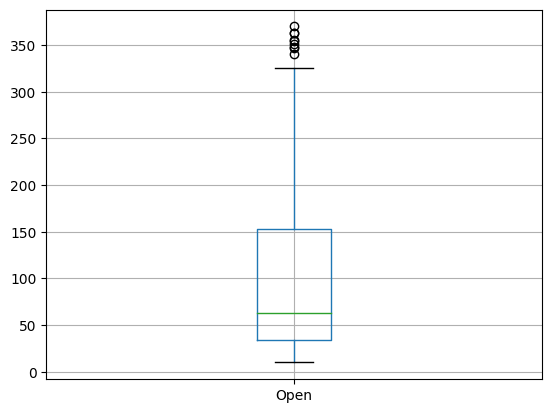

In [ ]:
# Handling Outliers & Outlier treatments
df.boxplot('Open')

In [ ]:
fig = px.box(np.log10(df['Open']))
fig.update_layout(xaxis=dict(title='boxplot'))
fig.show()

<Axes: >

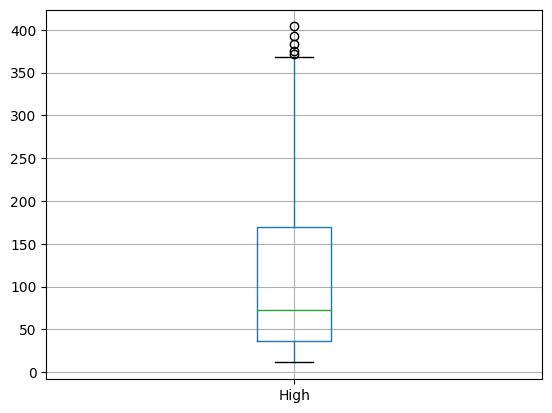

In [ ]:
df.boxplot('High')

In [ ]:
fig = px.box(np.log10(df['High']))
fig.update_layout(xaxis=dict(title='boxplot'))
fig.show()

<Axes: >

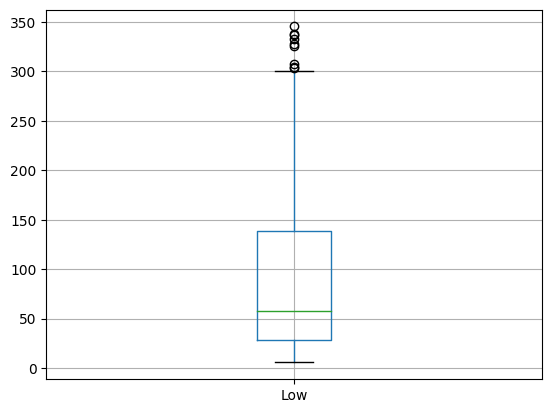

In [ ]:
df.boxplot('Low')

In [ ]:
fig = px.box(np.log10(df['Low']))
fig.update_layout(xaxis=dict(title='boxplot'))
fig.show()

<Axes: >

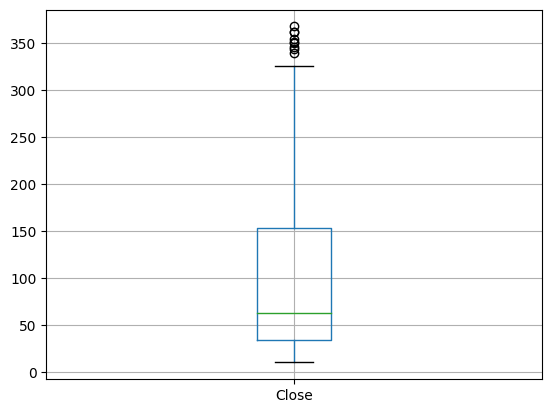

In [ ]:
df.boxplot('Close')

In [ ]:
fig = px.box(np.log10(df['Low']))
fig.update_layout(xaxis=dict(title='boxplot'))
fig.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used Log 10 to treat the outliers because the outlier is much high to manupulate the data and it is less in number


### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Already change date object time into date-time category while manupulating the data
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


#### 2. Feature Selection

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Create Ridge regression model
ridge = Ridge(alpha=0.5)

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(ridge, X_scaled, y, cv=5, scoring='r2')


In [ ]:
# Compute average R-squared score
avg_r2 = cv_scores.mean()

In [ ]:
print("Average R-squared score:", avg_r2)

Average R-squared score: -0.608238206054701


#Feature Scaling

In [ ]:
# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### What all feature selection methods have you used  and why?

 To compare their performance, and consider the stability and consistency of selected features across Standard scaler regression folds to make an informed decision.

##### Which all features you found important and why?

They provide valuable information for the model to make accurate predictions.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
X = df.drop(columns=['Close','Date'])
y = df['Close']

### 6. Data Scaling

In [ ]:
# Normalization
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

In [ ]:
#checking shape of training dataset.
X_train.shape

(148, 3)

In [ ]:
#checking shape of testing dataset.
X_test.shape

(37, 3)

##### Which method have you used to scale you data and why?

By normalizing the data, we ensure that each feature contributes proportionally during the learning process, leading to more stable and efficient convergence.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

This ratio involves splitting the dataset into 80% for training and 20% for testing/validation. The majority of the data is used for training, allowing the model to learn patterns and make predictions. The remaining portion is used for evaluation to assess the model's performance on unseen data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

**ML Model - Lasso Regression**

In [ ]:
lasso = Lasso(alpha=0.005, max_iter = 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.005, max_iter=3000)

In [ ]:
# prediction of train data
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso

array([1.53054895, 1.47298071, 2.83401266, 1.89809247, 2.63685933,
       1.49798992, 1.56303993, 1.64158112, 2.05381427, 1.65829809,
       1.63273556, 2.20853854, 1.66590377, 1.55969864, 1.46841987,
       1.51207847, 1.58932116, 1.52197472, 1.66755795, 1.60835101,
       2.30370792, 2.00406436, 2.83785041, 1.58361886, 1.49018602,
       1.95487457, 1.63706959, 1.53409179, 1.638129  , 1.97932892,
       1.63572874, 1.60213292, 2.07538063, 2.41251718, 1.63557658,
       1.60799955, 1.60334222])

In [ ]:
np.array(y_test)


array([1.45682135, 1.08778142, 2.56572979, 2.13618133, 2.48685536,
       1.35755372, 1.57898284, 1.79225157, 2.22520587, 1.75966784,
       1.68708284, 2.36398783, 1.7854722 , 1.53844805, 1.18892848,
       1.4034637 , 1.67495295, 1.3588862 , 1.81967552, 1.70731463,
       2.22530928, 2.18554215, 2.54406804, 1.70363524, 1.28981184,
       2.17429246, 1.7707784 , 1.47943134, 1.61752453, 2.18912521,
       1.79865065, 1.67504474, 2.22685757, 2.40401223, 1.72090317,
       1.69731654, 1.35121635])

**Evaluation Metrics of Lasso Regression:-**



In [ ]:
# Test Performance of lasso regression model

print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.0274
RMSE : 0.1655
MAE : 0.1424
MAPE : 0.0836
R2 : 0.8232


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

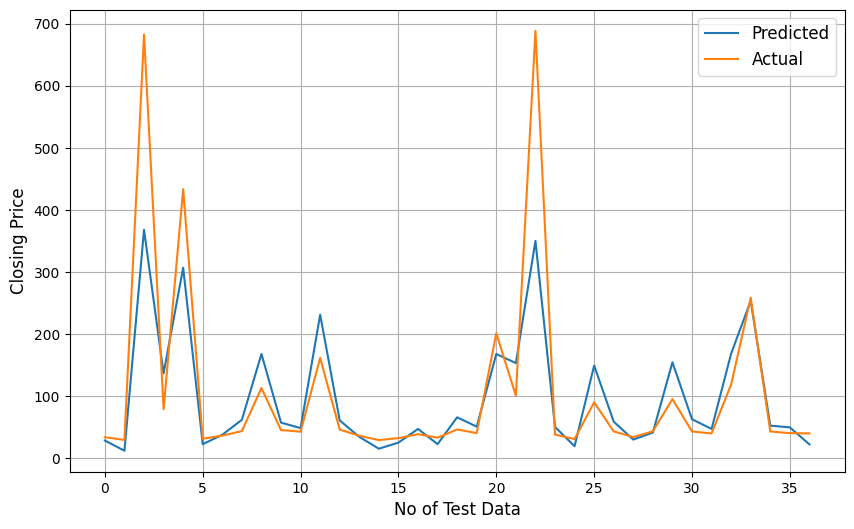

In [ ]:
# Actual Price vs. Predicted Price for Lasso Regression Plotting
# Actual price vs predicted price for lasso regression ploting
plt.figure(figsize= (10,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.legend(['Predicted', 'Actual'], fontsize = 12)
plt.xlabel('No of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize = 12)
plt.grid()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
lasso =Lasso()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Test performance

print("MSE :", round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :", round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)), 4))
print("MAE :", round(mean_absolute_error(y_test, y_pred_lasso), 4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso), 4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.0274
RMSE : 0.1655
MAE : 0.1424
MAPE : 0.0836
R2 : 0.8232


In [ ]:
# Prediction of test data .
y_pred_lasso1 = lasso_regressor.predict(X_test)
y_pred_lasso

array([1.53054895, 1.47298071, 2.83401266, 1.89809247, 2.63685933,
       1.49798992, 1.56303993, 1.64158112, 2.05381427, 1.65829809,
       1.63273556, 2.20853854, 1.66590377, 1.55969864, 1.46841987,
       1.51207847, 1.58932116, 1.52197472, 1.66755795, 1.60835101,
       2.30370792, 2.00406436, 2.83785041, 1.58361886, 1.49018602,
       1.95487457, 1.63706959, 1.53409179, 1.638129  , 1.97932892,
       1.63572874, 1.60213292, 2.07538063, 2.41251718, 1.63557658,
       1.60799955, 1.60334222])

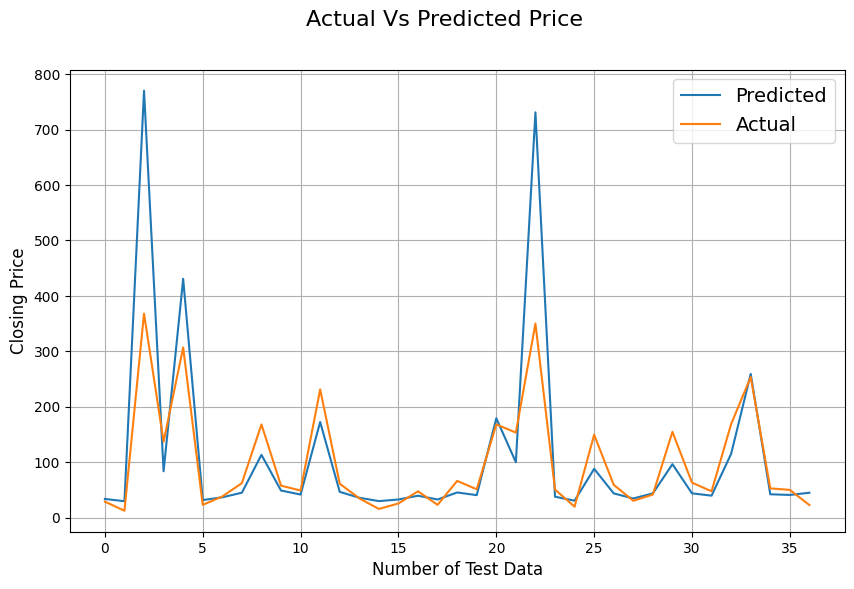

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_lasso1))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price', fontsize= 16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid()

##### Which hyperparameter optimization technique have you used and why?

 Grid search exhaustively searches the entire hyperparameter space by specifying a list of possible values for each hyperparameter. It performs a complete search and evaluates the model performance for each combination of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Based on these metrics, it seems that there is no significant improvement after applying cross-validation.

### ML Model - Ridge Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# fitting data into ridge regression

ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(X_train,y_train)

In [ ]:
#accuracy of lasso regression model
round(ridge_reg.score(X_train,y_train),4)

0.8167

In [ ]:
#prediction of test data.
y_pred_ridge = ridge_reg.predict(X_test)

In [ ]:
# Test Performance of ridge regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge), 3))

MSE : 0.029
RMSE : 0.17
MAE : 0.143
MAPE : 0.084
R2 : 0.814


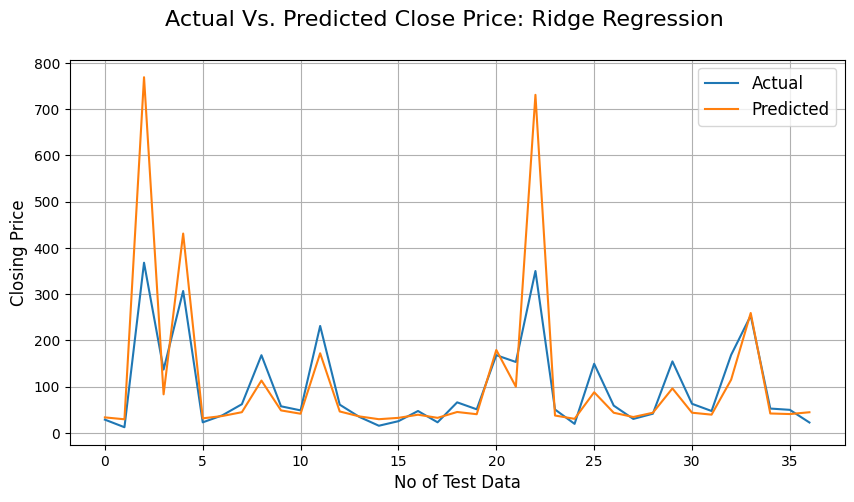

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Hyper-Parameter Tuning for Lasso Regression

ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model_cv = GridSearchCV(ridge_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [ ]:
ridge_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
#prediction of test data.
y_pred_ridge_cv = ridge_model_cv.predict(X_test)

**Evaluation Metrics of Ridge Regression:-**

In [ ]:
# Test Performance of ridge regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge_cv), 3))

MSE : 0.029
RMSE : 0.169
MAE : 0.143
MAPE : 0.084
R2 : 0.816


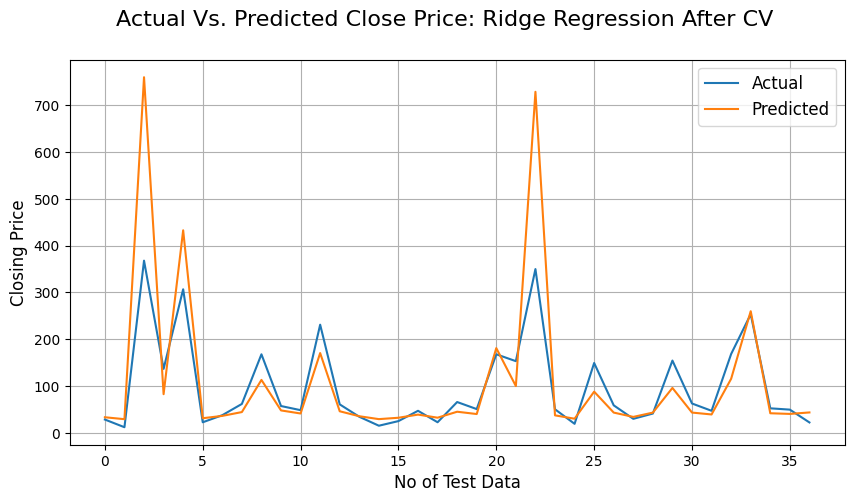

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()


##### Which hyperparameter optimization technique have you used and why?

Grid search exhaustively searches the entire hyperparameter space by specifying a list of possible values for each hyperparameter. It performs a complete search and evaluates the model performance for each combination of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

there is a slight improvement in the R2 score after cross-validation, but the other metrics either remained the same or showed a slight degradation.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Mean Squared Error (MSE):**

A lower MSE suggests that the model is making more accurate predictions, which can be valuable for decision-making and resource allocation in various business applications, such as financial forecasting, demand prediction, or risk assessment.

**Root Mean Squared Error (RMSE):**

 A lower RMSE implies that the model's predictions have smaller average errors, which can lead to improved decision-making, reduced financial losses, and enhanced efficiency in business processes.

 **Mean Absolute Error (MAE):**

 MAE helps assess the magnitude of errors in the model's predictions. A lower MAE indicates that, on average, the model's predictions are closer to the true values. This can be crucial for applications where minimizing errors is essential, such as pricing models, quality control, or demand forecasting.

 **Mean Absolute Percentage Error (MAPE):**

 MAPE is valuable when the relative magnitude of errors is important. A lower MAPE suggests that the model's predictions are closer to the actual values, which can enhance decision-making accuracy and improve resource allocation in various business domains, such as sales forecasting, inventory management, or production planning.

 **R-squared (R2):**

 R2 helps assess the model's explanatory power and its ability to capture the underlying patterns in the data. A higher R2 signifies that the model accounts for a larger proportion of the variability, indicating its effectiveness in predicting outcomes and supporting decision-making processes.

### ML Model - Elastic Net

In [ ]:
#fitting data into Elastic Net
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_model = elastic.fit(X_train,y_train)

In [ ]:
#accuracy of lasso regression model
round(elastic.score(X_train,y_train),4)

0.7956

In [ ]:
#prediction of test data.
y_pred_elastic = elastic.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),3))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 3))

MSE : 0.028
RMSE : 0.167
MAE : 0.139
MAPE : 0.085
R2 : 0.82


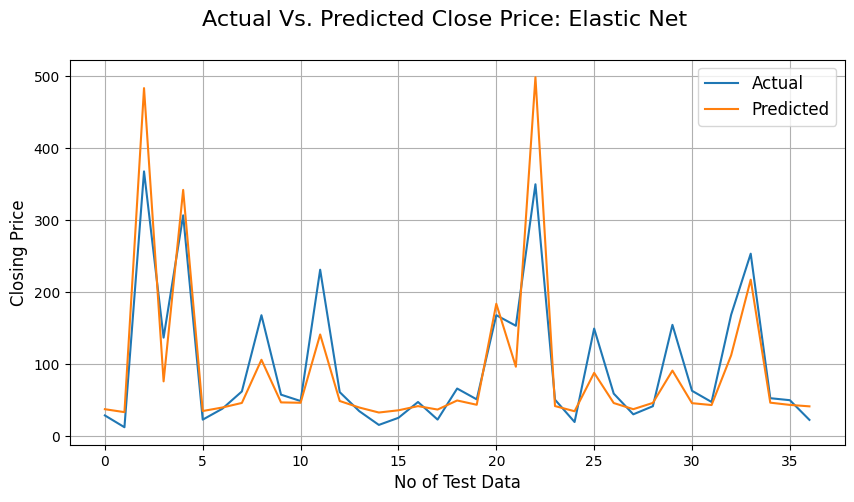

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Hyper-Parameter Tuning for Elastic Net

elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model_cv = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=3)

In [ ]:
elastic_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
#prediction of test and train data.
y_pred_elastic_cv = elastic_model_cv.predict(X_test)

**Evaluation Metrics of Elastic Net after CV:-**

In [ ]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_elastic_cv), 3))

MSE : 0.029
RMSE : 0.17
MAE : 0.143
MAPE : 0.084
R2 : 0.814


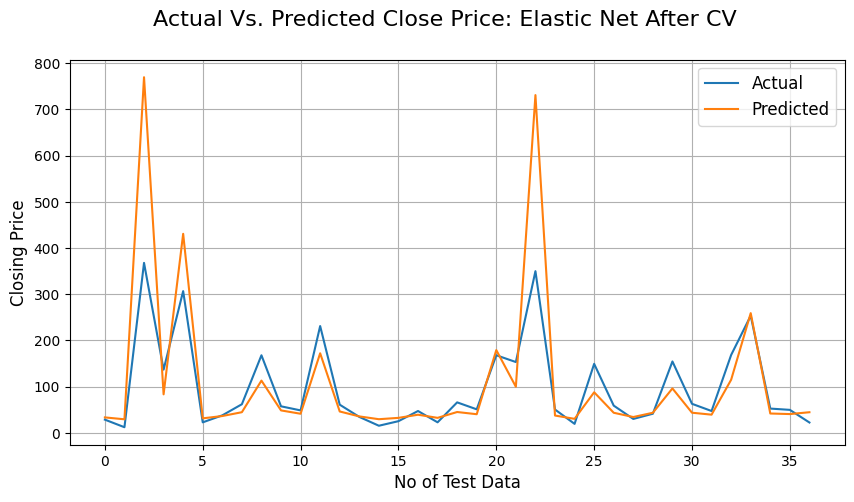

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

**XG Boost Regressor**

XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

In [ ]:
# fitting the data into XGBoost Regressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgb.score(X_train,y_train)

0.9999864902527874

In [ ]:
y_pred_XG = xgb.predict(X_test)
y_pred_XG

array([1.5297081, 1.127985 , 2.5119174, 2.047486 , 2.5007532, 1.2658988,
       1.6095268, 1.764186 , 2.2329402, 1.858956 , 1.7093459, 2.273477 ,
       1.7964447, 1.6175773, 1.1396252, 1.2162734, 1.6505052, 1.5191706,
       1.8158575, 1.6322107, 2.2636333, 2.2078586, 2.5119174, 1.7165941,
       1.2722952, 2.157964 , 1.7409655, 1.4477379, 1.8048646, 2.1556804,
       1.7612163, 1.6292331, 2.2321837, 2.4359899, 1.7417501, 1.7079544,
       1.72154  ], dtype=float32)

In [ ]:
np.array(y_test)

array([1.45682135, 1.08778142, 2.56572979, 2.13618133, 2.48685536,
       1.35755372, 1.57898284, 1.79225157, 2.22520587, 1.75966784,
       1.68708284, 2.36398783, 1.7854722 , 1.53844805, 1.18892848,
       1.4034637 , 1.67495295, 1.3588862 , 1.81967552, 1.70731463,
       2.22530928, 2.18554215, 2.54406804, 1.70363524, 1.28981184,
       2.17429246, 1.7707784 , 1.47943134, 1.61752453, 2.18912521,
       1.79865065, 1.67504474, 2.22685757, 2.40401223, 1.72090317,
       1.69731654, 1.35121635])

In [ ]:
# Test Performance of XGBoost model after validation

print("MSE :",round(mean_squared_error(y_test, y_pred_XG), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_XG)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_XG),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_XG),4))
print("R2 :",round(r2_score(y_test, y_pred_XG), 4))

MSE : 0.0083
RMSE : 0.091
MAE : 0.0588
MAPE : 0.0371
R2 : 0.9465


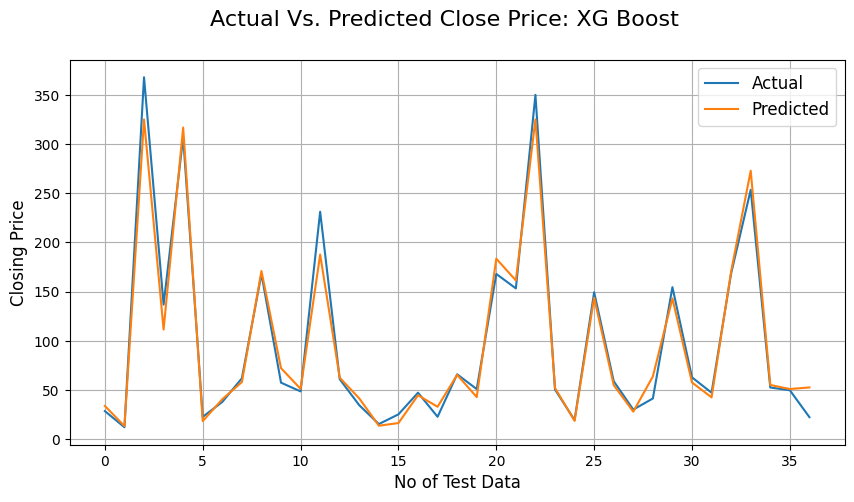

In [ ]:
# Actual Price vs. Predicted Price for XGboost after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_XG))
plt.suptitle('Actual Vs. Predicted Close Price: XG Boost', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()


In [ ]:
import xgboost as xgb

# Train the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Extract feature importance
importance = model.feature_importances_

# Print feature importance scores
for i, score in enumerate(importance):
    print("Feature {}: {:.4f}".format(i+1, score))


Feature 1: 0.0171
Feature 2: 0.6395
Feature 3: 0.3434


##### Which hyperparameter optimization technique have you used and why?

Grid search exhaustively searches the entire hyperparameter space by specifying a list of possible values for each hyperparameter. It performs a complete search and evaluates the model performance for each combination of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

the changes in the evaluation metrics are relatively small. While the MAPE shows a slight improvement.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

R-squared (R2):  A higher R2 value indicates a better fit of the model to the data and a higher proportion of variance explained.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

 the Lasso regression model appears to be the best choice for the final prediction model. It offers a good balance between predictive accuracy and interpretability, as Lasso regression can perform feature selection by shrinking some coefficient values to zero. This can help identify the most important features driving the predictions.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

From the scores, we can observe that Feature 2 has the highest importance score of 0.6395, indicating that it plays a significant role in the model's decision-making process.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. Close, Open and high price of stock are strongly correlated with each other.
2. We got a maximum accuracy of 82% in Lasso and Ridge regression.
3. The popularity of stock closing is growing extremely rapidly day by day which encourage researcher to find new methods if any fraud happens.
4. Xgboost regression is best model for yes bank stock closing price data this model use for further prediction
5. In this work we use lasso regression, ridge regression, elastic net regression and XGBoost Regression technique. these four models gives us the following results

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***